# Evaluation - Prepare Annotations

This notebook selects data to evaluate the use of HW for linking. It is mainly used for selecting image pairs for annotation.

We aim to evaluate
- multimodality (linking by image, text or both)
- model fine-tuning (fine-tuned models vs original siglip)

We ask people to annotate n image pairs
- for each multimodal search strategy we select records pairs using the following criteria:
    - Linked by all models
    - Linked only by the fine-tuned models
    - Linked only by siglip
    - Not linked
	


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import time
from pathlib import Path
import pandas as pd
from PIL import Image
from weavingtools.annotation_tools import *
from weavingtools.annotation_tools import plot_by_record, open_image
from weavingtools.linkage_tools import *
from weavingtools.embedding_tools import *
import scipy.spatial as sp
import ipyannotations.generic
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
sns.set()

In [3]:
collection_db = load_db("hw-16-08",'heritage-weaver-base','google/siglip-base-patch16-224')
collection_db_ft = load_db("hw-16-08",'heritage-weaver-ft','Kaspar/siglip-heritage-weaver-text-last')
collection_db_ft_best = load_db("hw-16-08",'heritage-weaver-ft-best','Kaspar/siglip-heritage-weaver-text-best')
collection_df = pd.read_csv('data/heritage_weaver_data.csv')


In [4]:
collection_db.count(),collection_db_ft.count(),collection_db_ft_best.count()

(107222, 107222, 107222)

# Create image pairs

In [5]:
#annotator = 'NK'
coll1, coll2 = 'smg','nms'
percentile = 99.0 
#randomize = True


In [6]:
edges_img_sigl, _, _ = get_edges(collection_db,coll1,coll2, 'image','image', 'max',percentile )
edges_img_sigl_ft, _, _ = get_edges(collection_db_ft,coll1,coll2, 'image','image', 'max',percentile )
edges_img_sigl_ft_best, _, _ = get_edges(collection_db_ft_best,coll1,coll2, 'image','image', 'max',percentile )

Get inputs...
Compute similarities...
--- Get similarities ---
--- Using 0.7563818202361199 as threshold ---
--- Aggregate similarities by record ---
--- Threshold similarities and binarize ---
Retrieve edges...
Get inputs...
Compute similarities...
--- Get similarities ---
--- Using 0.7661070561655263 as threshold ---
--- Aggregate similarities by record ---
--- Threshold similarities and binarize ---
Retrieve edges...
Get inputs...
Compute similarities...
--- Get similarities ---
--- Using 0.8216554902540544 as threshold ---
--- Aggregate similarities by record ---
--- Threshold similarities and binarize ---
Retrieve edges...


In [7]:
# agreement between the three methods
img_common_links = set(edges_img_sigl).intersection(edges_img_sigl_ft,edges_img_sigl_ft_best)
# only in siglip not an edge returned by fine-tuned models
img_only_siglip = set(edges_img_sigl).difference(edges_img_sigl_ft,edges_img_sigl_ft_best)
# agreement among fine-tuned models but not by siglip
img_agreement_only_ft = set(edges_img_sigl_ft).intersection(edges_img_sigl_ft_best).difference(edges_img_sigl)
# only siglip ft 
only_siglip_ft = set(edges_img_sigl_ft).difference(edges_img_sigl_ft_best,edges_img_sigl)
# only siglip ft best
img_only_siglip_ft_best = set(edges_img_sigl_ft_best).difference(edges_img_sigl_ft,edges_img_sigl)

In [8]:
edges_txt_sigl, _, _ = get_edges(collection_db,coll1,coll2, 'text','text', 'mean',percentile )
edges_txt_sigl_ft, _, _ = get_edges(collection_db_ft,coll1,coll2, 'text','text', 'mean',percentile )
edges_txt_sigl_ft_best, _, _ = get_edges(collection_db_ft_best,coll1,coll2, 'text','text', 'mean',percentile )

Get inputs...
Compute similarities...
--- Get similarities ---
--- Using 0.7896803665751463 as threshold ---
--- Aggregate similarities by record ---
--- Threshold similarities and binarize ---
Retrieve edges...
Get inputs...
Compute similarities...
--- Get similarities ---
--- Using 0.8599656041694197 as threshold ---
--- Aggregate similarities by record ---
--- Threshold similarities and binarize ---
Retrieve edges...
Get inputs...
Compute similarities...
--- Get similarities ---
--- Using 0.8868009537004167 as threshold ---
--- Aggregate similarities by record ---
--- Threshold similarities and binarize ---
Retrieve edges...


In [9]:
# agreement between the three methods
txt_common_links = set(edges_txt_sigl).intersection(edges_txt_sigl_ft,edges_txt_sigl_ft_best)
# only in siglip not an edge returned by fine-tuned models
txt_only_siglip = set(edges_txt_sigl).difference(edges_txt_sigl_ft,edges_txt_sigl_ft_best)
# agreement among fine-tuned models but not by siglip
txt_agreement_only_ft = set(edges_txt_sigl_ft).intersection(edges_txt_sigl_ft_best).difference(edges_txt_sigl)
# only siglip ft 
txt_only_siglip_ft = set(edges_txt_sigl_ft).difference(edges_txt_sigl_ft_best,edges_txt_sigl)
# only siglip ft best
txt_only_siglip_ft_best = set(edges_txt_sigl_ft_best).difference(edges_txt_sigl_ft,edges_txt_sigl)

In [10]:
edges_txt_img_sigl, _, _ = get_edges(collection_db,coll1,coll2, 'text','image', 'max',percentile )
edges_txt_img_sigl_ft, _, _ = get_edges(collection_db_ft,coll1,coll2, 'text','image', 'max',percentile )
edges_txt_img_sigl_ft_best, _, _ = get_edges(collection_db_ft_best,coll1,coll2, 'text','image', 'max',percentile )

Get inputs...
Compute similarities...
--- Get similarities ---
--- Using 0.09570732179132528 as threshold ---
--- Aggregate similarities by record ---
--- Threshold similarities and binarize ---
Retrieve edges...
Get inputs...
Compute similarities...
--- Get similarities ---
--- Using 0.09827218164253193 as threshold ---
--- Aggregate similarities by record ---
--- Threshold similarities and binarize ---
Retrieve edges...
Get inputs...
Compute similarities...
--- Get similarities ---
--- Using 0.10449278490318314 as threshold ---
--- Aggregate similarities by record ---
--- Threshold similarities and binarize ---
Retrieve edges...


In [11]:
# agreement between the three methods
txt_img_common_links = set(edges_txt_img_sigl).intersection(edges_txt_img_sigl_ft,edges_txt_img_sigl_ft_best)
# only in siglip not an edge returned by fine-tuned models
txt_img_only_siglip = set(edges_txt_img_sigl).difference(edges_txt_img_sigl_ft,edges_txt_img_sigl_ft_best)
# agreement among fine-tuned models but not by siglip
txt_img_agreement_only_ft = set(edges_txt_img_sigl_ft).intersection(edges_txt_img_sigl_ft_best).difference(edges_txt_img_sigl)
# only siglip ft 
txt_img_only_siglip_ft = set(edges_txt_img_sigl_ft).difference(edges_txt_img_sigl_ft_best,edges_txt_img_sigl)
# only siglip ft best
txt_img_only_siglip_ft_best = set(edges_txt_img_sigl_ft_best).difference(edges_txt_img_sigl_ft,edges_txt_img_sigl)

In [12]:
# # agreement between the three methods
# mult_common_links = set(txt_common_links).intersection(img_common_links)
# # only in siglip not an edge returned by fine-tuned models
# mult_only_siglip = set(txt_only_siglip).intersection(img_only_siglip)
# # agreement among fine-tuned models but not by siglip
# mult_agreement_only_ft = set(txt_agreement_only_ft).intersection(img_agreement_only_ft)
# # only siglip ft 
# mult_only_siglip_ft = set(txt_only_siglip_ft).intersection(only_siglip_ft)
# # only siglip ft text
# mult_only_siglip_ft_text = set(txt_only_siglip_ft_text).intersection(oimg_nly_siglip_ft_text)


In [13]:
all_links = [
   ('img_common_links', img_common_links), 
    ('img_only_siglip', img_only_siglip), 
    ('img_agreement_only_ft', img_agreement_only_ft), 
    ('only_siglip_ft', only_siglip_ft), 
    ('img_only_siglip_ft_text', img_only_siglip_ft_best),
    ('txt_common_links', txt_common_links), 
    ('txt_only_siglip', txt_only_siglip), 
    ('txt_agreement_only_ft', txt_agreement_only_ft), 
    ('txt_only_siglip_ft', txt_only_siglip_ft), 
    ('txt_only_siglip_ft_text', txt_only_siglip_ft_best),
    ('txt_img_common_links', txt_img_common_links), 
    ('txt_img_only_siglip', txt_img_only_siglip), 
    ('txt_img_agreement_only_ft', txt_img_agreement_only_ft), 
    ('txt_img_only_siglip_ft', txt_img_only_siglip_ft), 
    ('txt_img_only_siglip_ft_text', txt_img_only_siglip_ft_best),
    # ('mult_common_links', mult_common_links), 
    # ('mult_only_siglip', mult_only_siglip), 
    # ('mult_agreement_only_ft', mult_agreement_only_ft), 
    # ('mult_only_siglip_ft', mult_only_siglip_ft), 
    # ('mult_only_siglip_ft_text', mult_only_siglip_ft_text)
]
    

# Export links and images

In [259]:
annotator = 'GrG'

from random import shuffle
to_annotate = []
top_n = 7
for name, links in all_links:
    links = list(links)
    random.shuffle(links)
    to_annotate.extend([(name, *link) for link in links[:top_n]])

df_annotation = pd.DataFrame(to_annotate, columns=['link_type','source','target'])
df_annotation.shape

(105, 3)

In [260]:
df_imgs = collection_df[['record_id','img_url','img_path','description','name']].drop_duplicates().reset_index(drop=True)
df_annotation_with_img = df_annotation.merge(
    df_imgs, 
    left_on='source', right_on='record_id', how='left'
        ).merge(df_imgs, left_on='target', right_on='record_id', how='left', suffixes=('_source','_target'))
df_annotation_with_img.drop_duplicates(subset=['source','target'], inplace=True)
df_annotation_with_img.shape

(105, 13)

In [261]:
df_annotation_with_img.to_csv('data/heritage_weaver_annotations.csv', index=False)

In [262]:
def record_pair_image(record_description_pair):
    fig, axes = plt.subplots(1, 2, figsize=(15, 7.5))
    
    for i,pair in enumerate(record_description_pair):
        #i+=1
        img_path = pair[0]
        description = soft_wrap_text(pair[1][:200])
        
        img = Image.open(img_path).convert("RGB")
        img.thumbnail((224, 224))
        axes[i].imshow(img)
        axes[i].set_title(description, fontsize = 18)
        axes[i].axis('off')
         
    #plt.show()
    return fig

In [263]:
df_annotation_with_img = df_annotation_with_img.sample(frac=1).reset_index(drop=True)

In [264]:
image_source = list(df_annotation_with_img[['img_path_source','description_source']].values)
image_target = list(df_annotation_with_img[['img_path_target','description_target']].values)
image_pairs = list(zip(image_source, image_target))
len(image_pairs)

105

In [265]:
#data = [[i,record_pair_image(p)] for i,p in enumerate(image_pairs[:3])]

In [266]:
# pd.DataFrame(data).to_excel('data/heritage_weaver_annotations.xlsx', index=False)

In [267]:
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO

def save_images_for_annoation(image_pairs, output_path):
 
    """
    Save a DataFrame to Excel with matplotlib-generated images in specific cells.
    
    Parameters:
    - image pairs:
    - output: Output image.
    """
    #df = pd.DataFrame()
    # Create a Pandas Excel writer object using XlsxWriter as the engine
    #with pd.ExcelWriter(output_excel, engine='xlsxwriter') as writer:
        # Convert the DataFrame to an Excel object
    output_path = Path(output_path)
    output_path.mkdir(exist_ok=True, parents=True)
    for idx, img_pair in enumerate(image_pairs):
            # Create a BytesIO object to hold the image data in memory
            #image_data = BytesIO()

            # Generate the matplotlib figure and save it to the BytesIO object
            fig = record_pair_image(img_pair)  # Assume the function generates and returns a figure
            fig.savefig(output_path / f'{idx}.jpg', format='jpg')
            plt.close(fig)  # Close the figure to free up memory

            # Seek to the beginning of the BytesIO object so it can be read from
    print('done')




In [268]:
# Output Excel file path
output = f'data/linkage_annotations_{annotator}'

# Save DataFrame with matplotlib-generated images
save_images_for_annoation(image_pairs, output)
df_annotation_with_img.to_csv(f'{output}/{annotator}_metdata.csv', index=True)

done


# Analyse Annotations

## Retrieval

In [3]:
from pathlib import Path
import pandas as pd

descriptions = pd.read_csv('./data/retrieval_annotations/retrieval_annotations.csv')
descriptions['Row_number'] = [f'Row {i}' for i in range(1, 4) for _ in range(4)] * (descriptions.experiment_id.max() + 1)
descriptions.drop_duplicates(subset=['Row_number','experiment_id'], inplace=True)
descriptions['key'] = descriptions.apply(lambda x: f'{x.Row_number}_{x.experiment_id}', axis=1)
descriptions.shape

(72, 13)

In [4]:
annot_csv_files_1 =  list(Path('annotations/csv').glob('1_*.csv'))
print(len(annot_csv_files_1))

6


In [5]:
merged_df = []

for anno_file in annot_csv_files_1:
    df = pd.read_csv(anno_file)
    annotated = descriptions[descriptions.experiment_id <= df.index.max()]
    #print(annotated.shape)
    df = df[~df.choice.isnull()]
    df['key'] = df.apply(lambda x: f'{x.choice}_{x.name}', axis=1)
    merged = annotated.merge(df, on='key', how='left')
    merged['selected'] = merged['choice'].fillna(False).astype(bool)
    merged_df.append(merged)
    
merged_df = pd.concat(merged_df, axis=0)

In [6]:
merged_df['model'] = merged_df.model.map({'ft':'ft-last', 'ft-best':'ft-best', 'base':'base'})

In [7]:
merged_df[['selected','experiment_id','annotator','model']].reset_index(drop=True)

,selected,experiment_id,annotator,model
0,True,0,2.0,ft-best
1,False,0,NaN,base
2,False,0,NaN,ft-last
3,False,1,NaN,ft-last
4,True,1,2.0,base
...,...,...,...,...
424,False,22,NaN,ft-last
425,True,22,7.0,ft-best
426,False,23,NaN,ft-last
427,False,23,NaN,base


In [8]:
merged_df['experiment_start_from'] = merged_df.experiment_start_from.map({0:'1. top 4', 5:'2. top 5 to 9', 25:'3. top 25 to 29'})


In [9]:
merged_df.shape[0] / 9

47.666666666666664

<AxesSubplot:xlabel='model'>

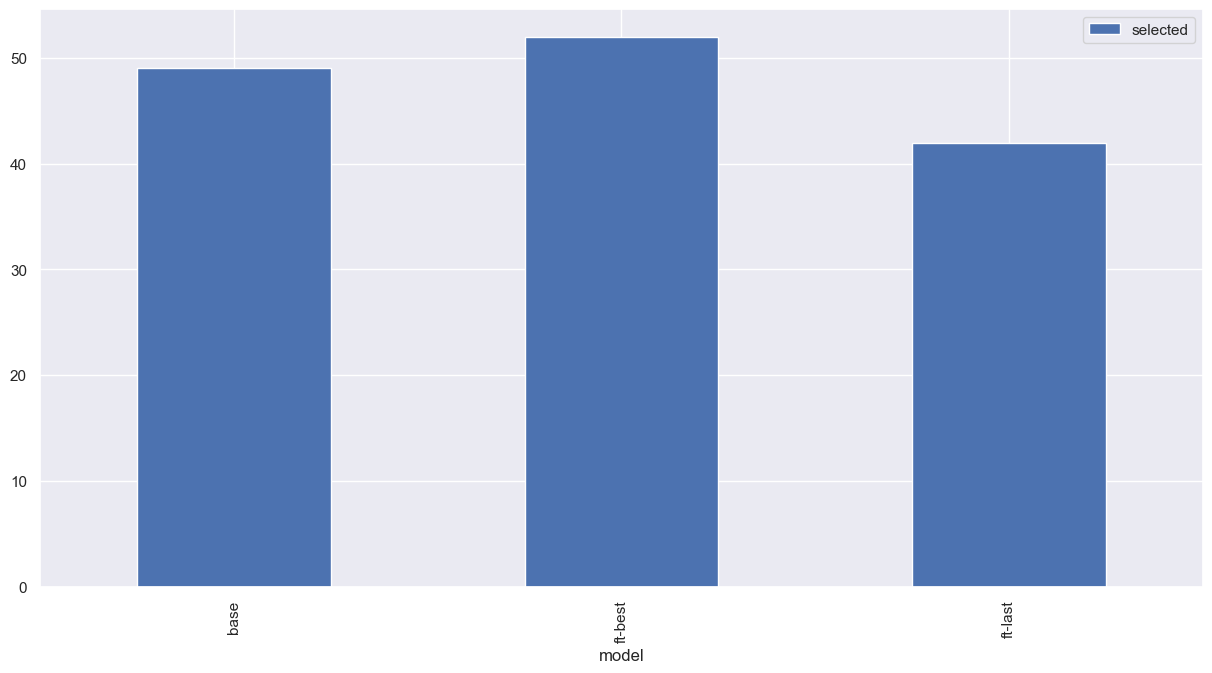

In [10]:
merged_df[['selected','model']].groupby('model').sum().plot(kind='bar', figsize=(15, 7.5))

<AxesSubplot:xlabel='experiment_start_from'>

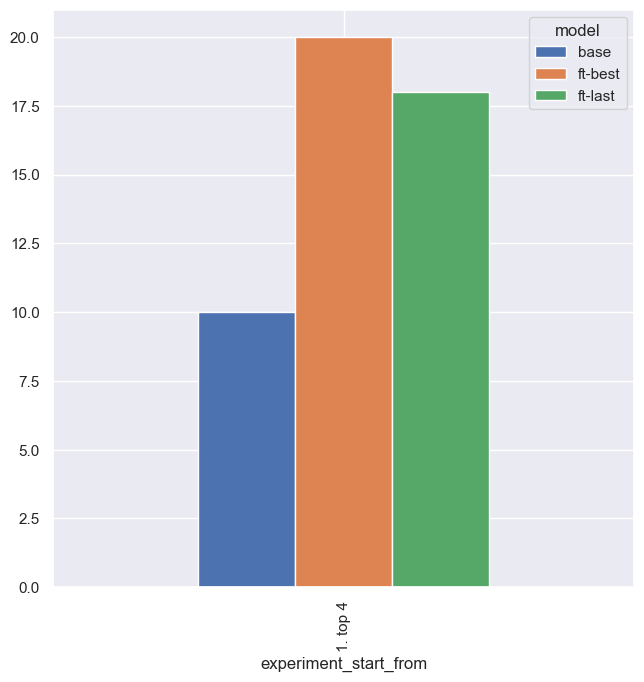

In [11]:
merged_df[merged_df.experiment_start_from=='1. top 4'].groupby(
    ['experiment_start_from','model'])['selected'].sum().unstack().plot(
            kind='bar', figsize=(7.5, 7.5))

<AxesSubplot:xlabel='experiment_start_from'>

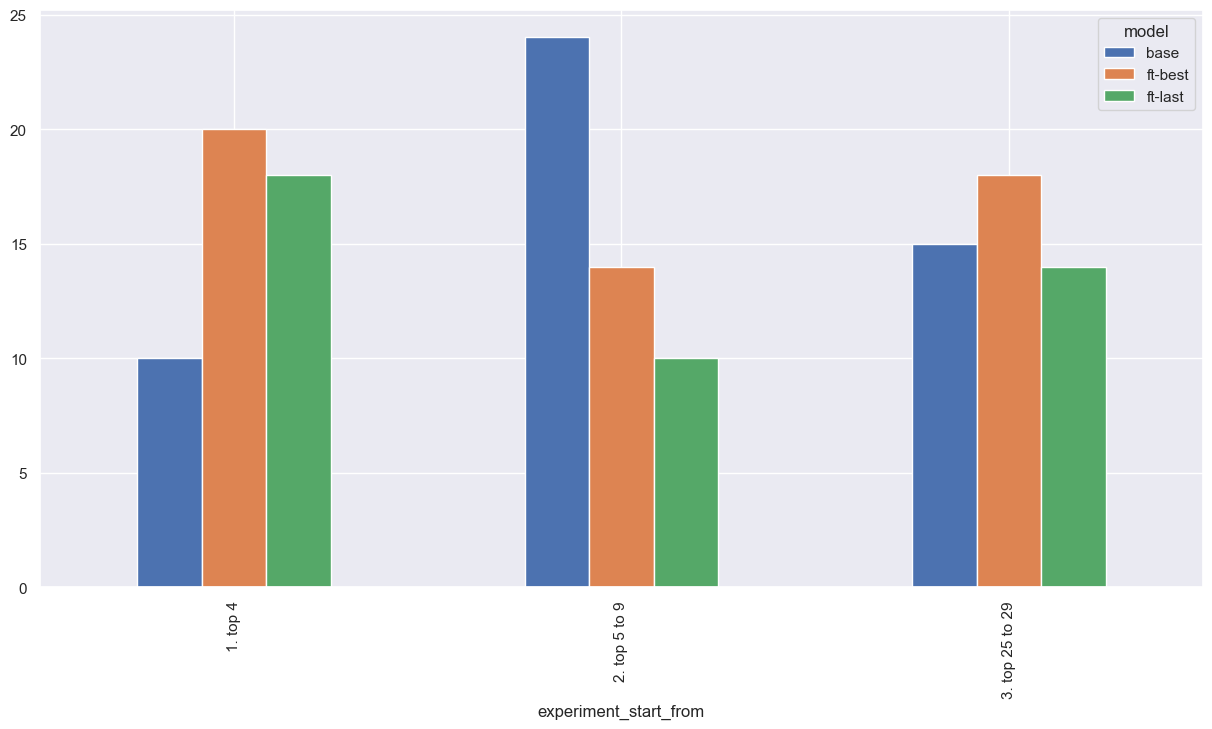

In [12]:
merged_df.groupby(['experiment_start_from','model'])['selected'].sum().unstack().plot(kind='bar', figsize=(15, 7.5))

## Linking

In [13]:
descriptions_dict = {int(p.stem.split('_')[1]):p for p in list(Path('./data').glob('linkage_annotations_*/*_*_*.csv'))}
descriptions_dict


{3: PosixPath('data/linkage_annotations_ML_3/ML_3_metdata.csv'),
 7: PosixPath('data/linkage_annotations_DB_7/DB_7_metdata.csv'),
 6: PosixPath('data/linkage_annotations_GB_6/GB_6_metdata.csv'),
 8: PosixPath('data/linkage_annotations_TK_8/TK_8_metdata.csv'),
 10: PosixPath('data/linkage_annotations_JA_10/JA_10_metdata.csv'),
 2: PosixPath('data/linkage_annotations_GG_2/GG_2_metdata.csv')}

In [14]:
annot_csv_files_2 =  list(Path('annotations/csv').glob('2_*.csv'))

dfs = []
for p in annot_csv_files_2:
    df = pd.read_csv(p)
    annotator_id = df.annotator.unique()[0]
    description = pd.read_csv(descriptions_dict[annotator_id],index_col=0)
    dfs.append(df.merge(description, left_index=True, right_index=True, how='left'))

df_all = pd.concat(dfs, axis=0, ignore_index=True)
df_all.shape

(551, 21)

In [15]:
df_all.shape

(551, 21)

<AxesSubplot:>

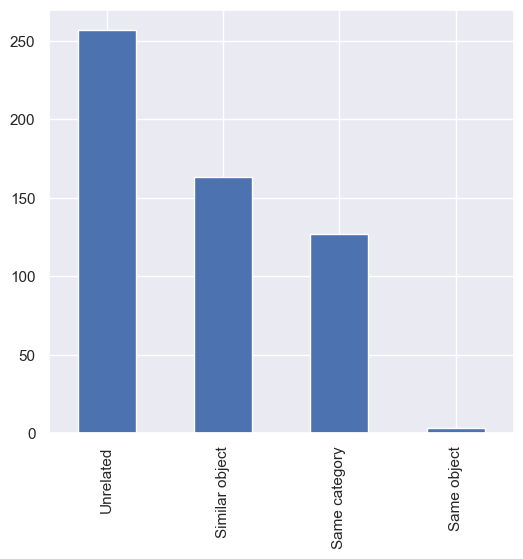

In [16]:
df_all.choice.value_counts().plot(kind='bar', figsize=(6, 5.5))

In [17]:
df_all.link_type.value_counts()

img_common_links               39
txt_common_links               39
txt_img_agreement_only_ft      39
txt_only_siglip                39
txt_img_only_siglip_ft         38
txt_only_siglip_ft_text        38
only_siglip_ft                 37
txt_only_siglip_ft             37
img_only_siglip                36
img_agreement_only_ft          36
txt_img_common_links           36
txt_img_only_siglip            36
txt_img_only_siglip_ft_text    34
img_only_siglip_ft_text        34
txt_agreement_only_ft          33
Name: link_type, dtype: int64

In [18]:
df_all.groupby('link_type')['choice'].size()

link_type
img_agreement_only_ft          36
img_common_links               39
img_only_siglip                36
img_only_siglip_ft_text        34
only_siglip_ft                 37
txt_agreement_only_ft          33
txt_common_links               39
txt_img_agreement_only_ft      39
txt_img_common_links           36
txt_img_only_siglip            36
txt_img_only_siglip_ft         38
txt_img_only_siglip_ft_text    34
txt_only_siglip                39
txt_only_siglip_ft             37
txt_only_siglip_ft_text        38
Name: choice, dtype: int64

In [19]:
model_type = {'img_agreement_only_ft' : [0,1,1],       
'img_common_links' :  [1,1,1],                
'img_only_siglip' :  [1,0,0],             
'img_only_siglip_ft_text' : [0,0,1],
'only_siglip_ft' : [0,1,0], 
'txt_agreement_only_ft' : [0,1,1],      
'txt_common_links' : [1,1,1],              
'txt_img_agreement_only_ft': [0,1,1],     
'txt_img_common_links' : [1,1,1],         
'txt_img_only_siglip' : [1,0,0],        
'txt_img_only_siglip_ft' : [0,1,0],     
'txt_img_only_siglip_ft_text'  : [0,0,1],  
'txt_only_siglip'   : [1,0,0],             
'txt_only_siglip_ft' : [0,1,0],            
'txt_only_siglip_ft_text' : [0,0,1]}
df_all['model'] = df_all.link_type.map(model_type)
df_all[['link_type','model']]

,link_type,model
0,txt_img_only_siglip_ft_text,"[0, 0, 1]"
1,img_only_siglip,"[1, 0, 0]"
2,img_common_links,"[1, 1, 1]"
3,txt_img_only_siglip_ft,"[0, 1, 0]"
4,img_agreement_only_ft,"[0, 1, 1]"
...,...,...
546,txt_common_links,"[1, 1, 1]"
547,img_only_siglip_ft_text,"[0, 0, 1]"
548,txt_img_common_links,"[1, 1, 1]"
549,txt_img_common_links,"[1, 1, 1]"


In [20]:
df_all.choice.value_counts()

Unrelated         257
Similar object    163
Same category     127
Same object         3
Name: choice, dtype: int64

In [21]:
label_dict = {'Unrelated' : 0,
'Similar object' : 2,
'Same category' : 1,
'Same object' : 3,}
df_all['label'] = df_all['choice'].map(label_dict)

In [22]:
df_all['label_binary'] = df_all['label'].apply(lambda x: 1 if x > 0 else 0) 


In [23]:
df_model = pd.DataFrame(df_all["model"].to_list(), columns=['siglio','siglip-ft', 'siglip-text'])
df_model['label'] = df_all['label_binary'].astype(int)

In [25]:
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
randomize = True


X_train = df_model[['siglio','siglip-ft', 'siglip-text']]
y_train = df_model['label']
model = LogisticRegression()
model.fit(X_train, y_train)
coefficients = list(model.coef_[0])
coefficients_random = []
for _ in tqdm(range(101)):
    y_train = y_train.sample(frac=1)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    coefficients_random.append(list(model.coef_[0]))


100%|██████████| 101/101 [00:00<00:00, 1000.59it/s]


In [26]:
coefficients

[-0.09849299967196773, 0.32786230389137716, 0.5122743553636917]

<AxesSubplot:>

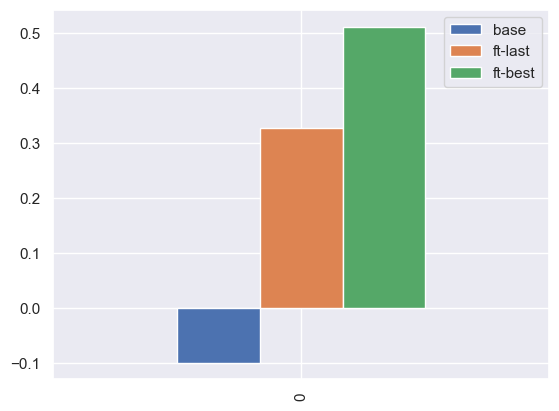

In [30]:
coeffs_df = pd.DataFrame([coefficients], columns=['base','ft-last', 'ft-best'])
coeffs_df.plot(kind='bar')

<AxesSubplot:>

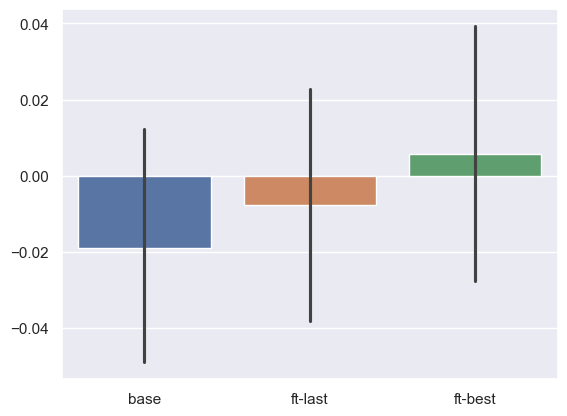

In [31]:
import seaborn as sns
sns.set()
coefficients_random_df = pd.DataFrame(coefficients_random,columns=['base','ft-last', 'ft-best'])
sns.barplot(coefficients_random_df)


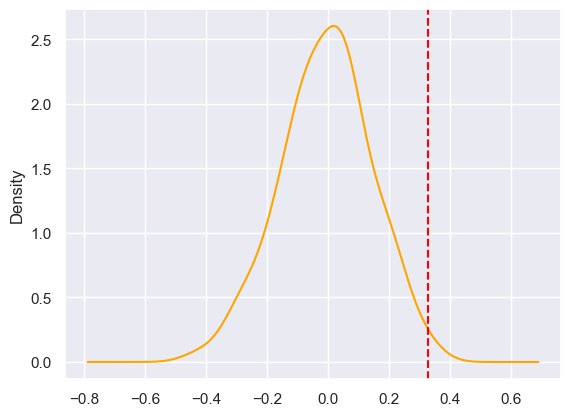

In [51]:

model = 'ft-last'
color = 'orange'
ax  = coefficients_random_df[model].plot(kind='density', color=color)
# you can add here as many lines as you want
ax.axvline(coeffs_df[model].values[0], color="red", linestyle="--" )

In [52]:
modality_type = {'img_agreement_only_ft' : [1,0,0],       
'img_common_links' :  [1,0,0],             
'img_only_siglip' : [1,0,0],          
'img_only_siglip_ft_text' : [1,0,0],   
'only_siglip_ft' : [1,0,0],   
'txt_agreement_only_ft' : [0,1,0],      
'txt_common_links' : [0,1,0],      
'txt_img_agreement_only_ft': [0,1,0],     
'txt_img_common_links' : [0,1,0],        
'txt_img_only_siglip' : [0,0,1],        
'txt_img_only_siglip_ft' :[0,0,1],
'txt_img_only_siglip_ft_text'  :[0,0,1],
'txt_only_siglip'   : [0,0,1],            
'txt_only_siglip_ft' : [0,0,1],           
'txt_only_siglip_ft_text' : [0,0,1],}
df_all['modality'] = df_all.link_type.map(modality_type)
#df_all[['link_type','modality']]

In [54]:
df_modality = pd.DataFrame(df_all["modality"].to_list(), columns=['img','text', 'txt_img'])
df_modality['label'] = df_all['label_binary'].astype(int)

In [55]:
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
randomize = True


X_train = df_modality[['img','text', 'txt_img']]
y_train = df_modality['label']
model = LogisticRegression()
model.fit(X_train, y_train)
coefficients = list(model.coef_[0])
coefficients_random = []
for _ in tqdm(range(101)):
    y_train = y_train.sample(frac=1)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    coefficients_random.append(list(model.coef_[0]))


100%|██████████| 101/101 [00:00<00:00, 1261.07it/s]


<AxesSubplot:>

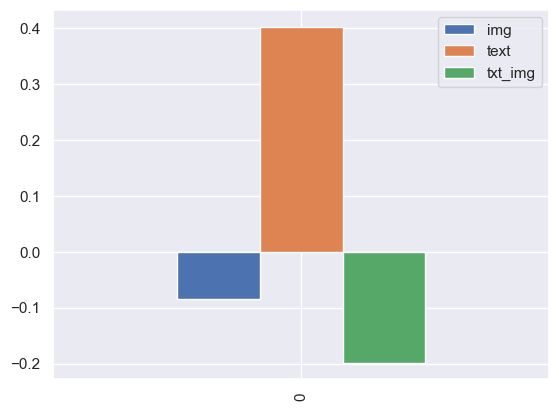

In [56]:
coeffs_df = pd.DataFrame([coefficients], columns=['img','text', 'txt_img'])
coeffs_df.plot(kind='bar')

In [57]:
X_train = pd.concat([df_modality[['img','text', 'txt_img']], df_model[['siglio','siglip-ft', 'siglip-text']]], axis=1)
y_train = df_modality['label']


In [59]:
X_trainmodel = LogisticRegression()
model.fit(X_train, y_train)
coefficients = list(model.coef_[0])
coefficients_random = []
for _ in tqdm(range(101)):
    y_train = y_train.sample(frac=1)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    coefficients_random.append(list(model.coef_[0]))

100%|██████████| 101/101 [00:00<00:00, 872.46it/s]


<AxesSubplot:>

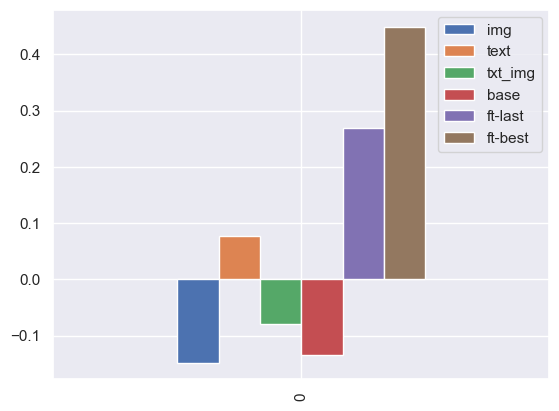

In [61]:
coeffs_df = pd.DataFrame([coefficients], columns=['img','text', 'txt_img','base','ft-last', 'ft-best'])
coeffs_df.plot(kind='bar')